# Set Up

In [167]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time

# ignore warnings
from sklearn.exceptions import DataConversionWarning
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=DataConversionWarning)
warnings.simplefilter("ignore", category=PendingDeprecationWarning)
warnings.simplefilter('ignore', category=DeprecationWarning)


plt.rcParams.update({'figure.max_open_warning': 0})

# seaborn plot settings
sns.set(style="ticks", rc={'figure.figsize':(12,8)})
sns.set_palette("hls")

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [172]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

print("Success!")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Success!


# Data Exploration

In [195]:
# view digit image examples from the dataset
from PIL import Image

def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    img = Image.fromarray(two_d, 'L')
    return img

batch_xs, batch_ys = mnist.test.next_batch(10)

for i in range(10):
    display(gen_image(batch_xs[i])) 

# Parameters

In [135]:
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# Hidden Layers and Neurons

In [136]:
# number of neurons for n hidden layers
n_hidden1_a = 20
n_hidden2_a = 20

n_hidden1_b = 50
n_hidden2_b = 50

n_hidden1_c = 20
n_hidden2_c = 20
n_hidden3_c = 20
n_hidden4_c = 20
n_hidden5_c = 20

n_hidden1_d = 50
n_hidden2_d = 50
n_hidden3_d = 50
n_hidden4_d = 50
n_hidden5_d = 50

# MNIST data shape
n_inputs = 28*28

# Total outputs for MNIST data (0-9 digits)
n_classes = 10

# Graphical Input

In [137]:
# TF Graph Input
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

# Model Set Up 

In [138]:
# Store layers weight & bias
weights = {
    'h1a': tf.Variable(tf.random_normal([n_inputs, n_hidden1_a])),
    'h2a': tf.Variable(tf.random_normal([n_hidden1_a, n_hidden2_a])),
    'outa': tf.Variable(tf.random_normal([n_hidden2_a, n_classes])),
    
    'h1b': tf.Variable(tf.random_normal([n_inputs, n_hidden1_b])),
    'h2b': tf.Variable(tf.random_normal([n_hidden1_b, n_hidden2_b])),
    'outb': tf.Variable(tf.random_normal([n_hidden2_b, n_classes])),
    
    'h1c': tf.Variable(tf.random_normal([n_inputs, n_hidden1_c])),
    'h2c': tf.Variable(tf.random_normal([n_hidden1_c, n_hidden2_c])),
    'h3c': tf.Variable(tf.random_normal([n_hidden2_c, n_hidden3_c])),
    'h4c': tf.Variable(tf.random_normal([n_hidden3_c, n_hidden4_c])),
    'h5c': tf.Variable(tf.random_normal([n_hidden4_c, n_hidden5_c])),
    'outc': tf.Variable(tf.random_normal([n_hidden5_c, n_classes])),
    
    'h1d': tf.Variable(tf.random_normal([n_inputs, n_hidden1_d])),
    'h2d': tf.Variable(tf.random_normal([n_hidden1_d, n_hidden2_d])),
    'h3d': tf.Variable(tf.random_normal([n_hidden2_d, n_hidden3_d])),
    'h4d': tf.Variable(tf.random_normal([n_hidden3_d, n_hidden4_d])),
    'h5d': tf.Variable(tf.random_normal([n_hidden4_d, n_hidden5_d])),
    'outd': tf.Variable(tf.random_normal([n_hidden5_d, n_classes]))
}
biases = {
    'b1a': tf.Variable(tf.random_normal([n_hidden1_a])),
    'b2a': tf.Variable(tf.random_normal([n_hidden2_a])),
    
    'b1b': tf.Variable(tf.random_normal([n_hidden1_b])),
    'b2b': tf.Variable(tf.random_normal([n_hidden2_b])),
    
    'b1c': tf.Variable(tf.random_normal([n_hidden1_c])),
    'b2c': tf.Variable(tf.random_normal([n_hidden2_c])),
    'b3c': tf.Variable(tf.random_normal([n_hidden3_c])),
    'b4c': tf.Variable(tf.random_normal([n_hidden4_c])),
    'b5c': tf.Variable(tf.random_normal([n_hidden5_c])),
    
    'b1d': tf.Variable(tf.random_normal([n_hidden1_d])),
    'b2d': tf.Variable(tf.random_normal([n_hidden2_d])),
    'b3d': tf.Variable(tf.random_normal([n_hidden3_d])),
    'b4d': tf.Variable(tf.random_normal([n_hidden4_d])),
    'b5d': tf.Variable(tf.random_normal([n_hidden5_d])),
    
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [139]:
# Define the Model
def multilayer_perceptron_a(x):
    # Hidden fully connected layers with 20 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1a']), biases['b1a'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2a']), biases['b2a'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['outa']) + biases['out']
    return out_layer

def multilayer_perceptron_b(x):
    # Hidden fully connected layers with 50 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1b']), biases['b1b'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2b']), biases['b2b'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['outb']) + biases['out']
    return out_layer

def multilayer_perceptron_c(x):
    # Hidden fully connected layers with 20 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1c']), biases['b1c'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2c']), biases['b2c'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3c']), biases['b3c'])
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4c']), biases['b4c'])
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5c']), biases['b5c'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_5, weights['outc']) + biases['out']
    return out_layer

def multilayer_perceptron_d(x):
    # Hidden fully connected layers with 50 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1d']), biases['b1d'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2d']), biases['b2d'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3d']), biases['b3d'])
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4d']), biases['b4d'])
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5d']), biases['b5d'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_5, weights['outd']) + biases['out']
    return out_layer

# Model A - Benchmark

Hidden Layers: 2 <br>
Neurons per Layer: 20

In [140]:
# Model A Construction
logits_a = multilayer_perceptron_a(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits_a, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits_a, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init_a = tf.global_variables_initializer()

In [141]:
%time

model_accuracy = []
model_time = []

# Train the data
with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init_a)
    
    #initialize time
    start_time = time.clock()
    
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    
    #End Time
    end_time = time.clock()

    modela_runtime = end_time - start_time
    
    #append the results to the list
    model_time.append(modela_runtime)
    
    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    modela_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      y: mnist.test.labels})
    model_accuracy.append(modela_accuracy)
    
    print("Model A Test Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      y: mnist.test.labels}))
    

Wall time: 0 ns
Step 1, Minibatch Loss= 237.3919, Training Accuracy= 0.180
Step 100, Minibatch Loss= 6.1964, Training Accuracy= 0.812
Step 200, Minibatch Loss= 1.5281, Training Accuracy= 0.828
Step 300, Minibatch Loss= 0.5680, Training Accuracy= 0.891
Step 400, Minibatch Loss= 0.8102, Training Accuracy= 0.852
Step 500, Minibatch Loss= 0.6271, Training Accuracy= 0.867
Optimization Finished!
Model A Test Accuracy: 0.8582


# Model B

Hidden Layers: 2 <br>
Neurons per Layer: 50

In [142]:
# Model A Construction
logits_b = multilayer_perceptron_b(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits_b, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits_b, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init_b = tf.global_variables_initializer()

In [143]:
%time

# Train the data
with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init_b)
    
    #initialize time
    start_time = time.clock()
    
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    
    #End Time
    end_time = time.clock()

    modelb_runtime = end_time - start_time
    
    #append the results to the list
    model_time.append(modelb_runtime)
    
    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    modelb_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      y: mnist.test.labels})
    model_accuracy.append(modelb_accuracy)
    
    print("Model A Test Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      y: mnist.test.labels}))
    

Wall time: 0 ns
Step 1, Minibatch Loss= 1136.4633, Training Accuracy= 0.188
Step 100, Minibatch Loss= 17.2739, Training Accuracy= 0.859
Step 200, Minibatch Loss= 10.6956, Training Accuracy= 0.859
Step 300, Minibatch Loss= 4.8267, Training Accuracy= 0.914
Step 400, Minibatch Loss= 4.9032, Training Accuracy= 0.859
Step 500, Minibatch Loss= 4.9857, Training Accuracy= 0.805
Optimization Finished!
Model A Test Accuracy: 0.8562


# Model C

Hidden Layers: 5 <br>
Neurons per Layer: 20

In [144]:
# Model A Construction
logits_c = multilayer_perceptron_c(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits_c, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits_c, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init_c = tf.global_variables_initializer()

In [145]:
%time

# Train the data
with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init_c)
    
    #initialize time
    start_time = time.clock()
    
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    
    #End Time
    end_time = time.clock()

    modelc_runtime = end_time - start_time
    
    #append the results to the list
    model_time.append(modelc_runtime)
    
    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    modelc_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      y: mnist.test.labels})
    model_accuracy.append(modelc_accuracy)
    
    print("Model A Test Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      y: mnist.test.labels}))
    

Wall time: 0 ns
Step 1, Minibatch Loss= 7354.0020, Training Accuracy= 0.297
Step 100, Minibatch Loss= 112.6850, Training Accuracy= 0.781
Step 200, Minibatch Loss= 31.8501, Training Accuracy= 0.797
Step 300, Minibatch Loss= 17.6252, Training Accuracy= 0.781
Step 400, Minibatch Loss= 5.8752, Training Accuracy= 0.844
Step 500, Minibatch Loss= 7.8933, Training Accuracy= 0.805
Optimization Finished!
Model A Test Accuracy: 0.8151


# Model D

In [146]:
# Model A Construction
logits_d = multilayer_perceptron_d(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits_d, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits_d, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init_d = tf.global_variables_initializer()

In [147]:
%time

# Train the data
with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init_d)
    
    #initialize time
    start_time = time.clock()
    
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    
    #End Time
    end_time = time.clock()

    modeld_runtime = end_time - start_time
    
    #append the results to the list
    model_time.append(modeld_runtime)
    
    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    modeld_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      y: mnist.test.labels})
    model_accuracy.append(modeld_accuracy)
    
    print("Model A Test Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      y: mnist.test.labels}))
    

Wall time: 0 ns
Step 1, Minibatch Loss= 323274.7500, Training Accuracy= 0.297
Step 100, Minibatch Loss= 2332.8386, Training Accuracy= 0.844
Step 200, Minibatch Loss= 1503.4697, Training Accuracy= 0.812
Step 300, Minibatch Loss= 2263.0779, Training Accuracy= 0.820
Step 400, Minibatch Loss= 477.3395, Training Accuracy= 0.836
Step 500, Minibatch Loss= 336.1157, Training Accuracy= 0.836
Optimization Finished!
Model A Test Accuracy: 0.8586


# Final Results 

In [148]:
# Create results df starting off with Hidden Layers and Nodes
hidden_layers = [2, 2, 5, 5]
nodes = [20, 50, 20, 50]

nodes = pd.DataFrame(nodes,
                     columns=['Nodes per Layer'], 
                             index=['Model A','Model B','Model C','Model D'])
hidden_layers = pd.DataFrame(hidden_layers, 
                             columns=['# of Hidden Layers'], 
                             index=['Model A','Model B','Model C','Model D'])
results = hidden_layers
results['Nodes per Layer'] = nodes['Nodes per Layer']

# add processing time
model_time = pd.DataFrame(model_time,
                          columns=['Processing Time (seconds)'], 
                          index=['Model A','Model B','Model C','Model D'])
results['Processing Time (seconds)'] = model_time['Processing Time (seconds)']

# add test accuracy scores
model_accuracy = pd.DataFrame(model_accuracy,
                              columns=['Test Set Accuracy'], 
                              index=['Model A','Model B','Model C','Model D'])

results['Test Set Accuracy'] = model_accuracy['Test Set Accuracy']

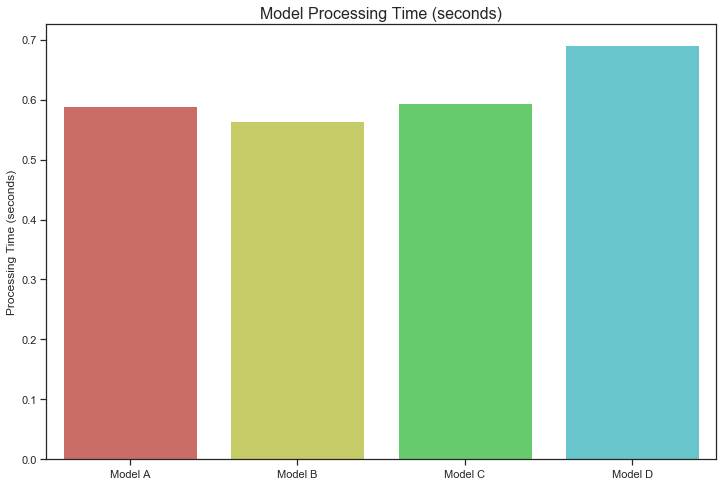

In [168]:
plt.title('Model Processing Time (seconds)', fontsize=16)
sns.barplot(x=results.index, y=results['Processing Time (seconds)'], data=results)

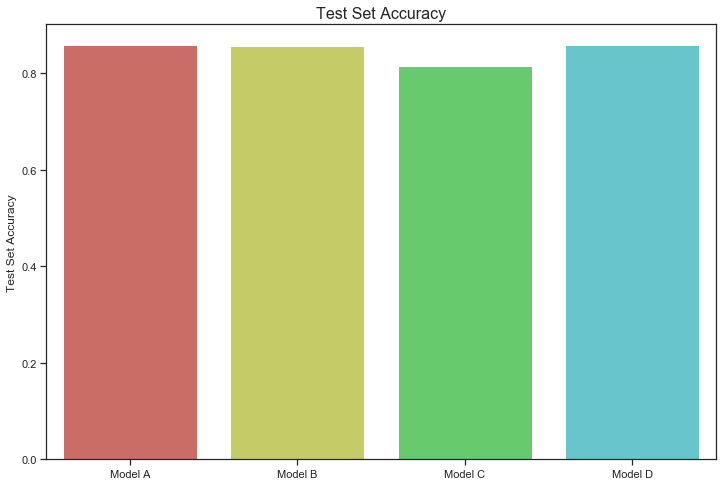

In [169]:
plt.title('Test Set Accuracy', fontsize=16)
sns.barplot(x=results.index, y=results['Test Set Accuracy'], data=results)

In [152]:
print("Multilayer Perceptron Benchmark Experiment Results")
results

Multilayer Perceptron Benchmark Experiment Results


,# of Hidden Layers,Nodes per Layer,Processing Time (seconds),Test Set Accuracy
Model A,2,20,0.588576,0.8582
Model B,2,50,0.564457,0.8562
Model C,5,20,0.594847,0.8151
Model D,5,50,0.690888,0.8586
